Go to BioMart, choose the database (Ensembl Genes 98).

Choose Drosophila genome (BDGP6.22)

Filters: Gene -> Gene type: protein_coding  (only coding genes)

Attributes: Sequences marker 

Sequence -> Flank(Gene) because we want to study the initiation of the transcription, this time.

Sequence -> Upstream flank -> 100, to specify how long is the flank

Header -> Gene Information -> Gene stable ID

Header -> Transcript information -> remove everything, we are not interested in many transcripts



Click on RESULTS; and download the results as compressed FASTA.

Get the file, unzip with `gunzip filename`, then `cat mart_export.txt | grep ">" -c` to count sequences.


There are both genes in REVERSE filament coding!! How can we do that? On a new genebank tab, with a BLAST. I'll then get reverse complement for reverse coding sequences.

Open a ensembl.org page, select [Drosophila](http://www.ensembl.org/Drosophila_melanogaster/Info/Index). All locations are coded by `Chromosome:start-end`.

We, for example look for a reverse transcripted file, find the name, and look at it in our downloaded file (ex. FBgn0001137)

`| grep "gene name" -C2   // context 2, find the gene sequence in the file

http://www.ensembl.org/Drosophila_melanogaster/Tools/Blast  and interrogate the correct D.melanogaster DB. and run.


When queue and run, you can click "Show results".

2L:8433599-8433698 Orientation: Reverse	Query start/end: 1/100	Length: 100 [Sequence]	Score: 198	E-Value: 3e-50	%ID: 100.00 [Alignment]  is the best alignment.

Check on Ensembl: http://www.ensembl.org/Drosophila_melanogaster/Location/View?r=2L:8432402-8434903;tl=lcIDcL8Tz6iUKkIC-5760843-753262842;db=core


End of check. Always check. **Always check data.**


# what are we doing now?

find a windows of 6 bp, count and collect for every sequence, the occurrences of 6bp-words.

In [21]:
library(Biostrings)

# RTFM about classes in Biostrings.

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Loading required package: S4Vectors
Loading required package: stats4

Attaching package: ‘S4Vectors’

The followin

In [36]:
# use bash commands in R notebook:
system("ls", intern=TRUE)


[1] "lesson1.md"      "lesson2.md"      "lesson3.md"      "lesson4.ipynb"  
[5] "lesson4.md"      "mart_export.txt"

In [38]:
# loading a FASTA file in R: from Biostrings quick overview Documentation...
# eventually setwd("the directory where the files are located...")
seq <- readDNAStringSet("mart_export.txt")  #read FASTA from text file. RTFM about options.


In [39]:
# let's examine what we loaded:
seq

  A DNAStringSet instance of length 13931
        width seq                                           names               
    [1]   100 CCGCCGCTGCTGCAGTCGACG...AGAACGCTCGCATGGCTTTTG FBgn0000014
    [2]   100 CTCTTAAAATTTGTGTTTTGG...CCACATCGCAAGGCAACTCGT FBgn0000008
    [3]   100 GTCGGCGTCGTATATCCGAGC...CCTGGAAACTAACAGCGATTC FBgn0000015
    [4]   100 AAAAGCATTAATATTATTATT...TAACTGCGGTCACACTTTACT FBgn0000018
    [5]   100 TGATGGTGTGTGTGTAGCCAA...CTGTTTTCTCCGATTCTCCGC FBgn0000024
    ...   ... ...
[13927]   100 GGATTTCGGATTTCATTTAAG...AATGGCGAAAACAATGCTGCC FBgn0262104
[13928]   100 TAATAATTATTAGCCCAATAT...TTTAAGGGTTCCTCGCTATTT FBgn0262823
[13929]   100 GGCTCTCTGGTTCGGTTCTTA...GCGTTCGTGCGCTTTTTGAAA FBgn0262160
[13930]   100 AGTGTATCGATAGGGCGGCAC...TGATTAGAGCACTATCGATAG FBgn0263755
[13931]   100 TTTTTGTTTCTCAATTTTTAT...CACCCGCGCATCGAGGTGCTG FBgn0286222

In [42]:
#accessing a single sequence by indexing:
seq[1]


  A DNAStringSet instance of length 1
    width seq                                               names               
[1]   100 CCGCCGCTGCTGCAGTCGACGTT...TAAGAACGCTCGCATGGCTTTTG FBgn0000014

[1] 1

In [49]:
# accessing a sequence by name requires a function: TMTOWTDI (there's more than one way to do it.)
seq[names(seq)=="FBgn0262823"]


  A DNAStringSet instance of length 1
    width seq                                               names               
[1]   100 TAATAATTATTAGCCCAATATAA...CATTTAAGGGTTCCTCGCTATTT FBgn0262823

In [60]:
# matching with regex
# TO DO: debug this shit.
# https://stackoverflow.com/questions/4353834/search-through-nsstring-using-regular-expression
install.packages("stringr")
library(stringr)
seq[names(seq)==regex("FBgn0262823")]

  A DNAStringSet instance of length 1
    width seq                                               names               
[1]   100 TAATAATTATTAGCCCAATATAA...CATTTAAGGGTTCCTCGCTATTT FBgn0262823

In [74]:
# consensus matrix
# ?consensusMatrix
counts <- consensusMatrix(seq)[1:4,]   #subsetting it, because it takes all other letters beyond ATCG. It has 100 columns.
counts

A,4382,4410,4387,4416,4325,4400,4360,4309,4379,4271,⋯,3711,3742,3671,3710,3847,3771,3942,4025,3668,3261
C,2623,2575,2632,2492,2694,2668,2640,2630,2640,2570,⋯,3340,3219,3259,3180,3139,3260,3331,3064,3173,3556
G,2479,2609,2567,2547,2532,2500,2590,2551,2579,2686,⋯,3009,3098,3096,3113,3120,2947,2950,3095,2856,3108
T,4440,4330,4338,4469,4373,4356,4334,4434,4326,4397,⋯,3866,3867,3900,3923,3820,3948,3703,3742,4229,4001


In [75]:
str(counts) #labels

 int [1:4, 1:100] 4382 2623 2479 4440 4410 2575 2609 4330 4387 2632 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:4] "A" "C" "G" "T"
  ..$ : NULL


In [95]:
#range of values
c(min(counts),max(counts))  
dim(counts)[2]

[1] 2479 4469

[1] 100

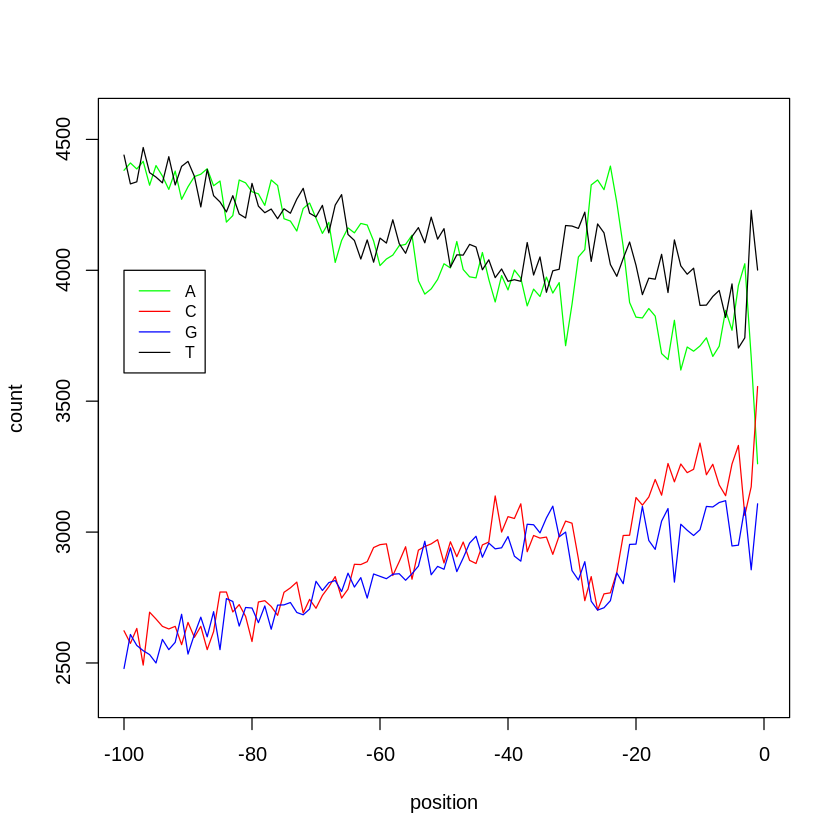

In [121]:
# plotting consensus matrix
# input: a "counts" item with

plot(100,100,            # get an empty plot with a fake point
     xlab = "position",  # label axes
     ylab = "count", 
     xlim=c(-dim(counts)[2],0), # set graph x limit, taken from the consensus matrix item count
     ylim=c(min(counts)-100,    # set graph height, taken from max and min values of the counts
            max(counts)+100))  
lines(-100:-1, counts[1,], col="green")  # A: get items in reverse order
lines(-100:-1, counts[2,], col="red")    # C
lines(-100:-1, counts[3,], col="blue")   # G
lines(-100:-1, counts[4,], col="black")  # T

# add legend , just verify if the order of the letters is the same.
legend(-dim(counts)[2],4000,legend=c("A", "C", "G", "T"),  
       col=c("green", "red", "blue", "black"), lty=1, cex=0.8)

There seems to be a "bubble" at -30. That could be interesting to explore.